In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_ids = test["PassengerId"]

def clean(data):
    data = data.drop(["Ticket", "Cabin" , "Name" , "PassengerId"], axis = 1)

    cols = ["SibSp", "Parch","Fare","Age"]
    for col in cols: 
        data[col].fillna(data[col].median(), inplace = True)

    data.Embarked.fillna("U", inplace = True) 
    return data

data = clean(data)
test = clean(test)   

In [6]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["Sex", "Embarked"]
for col in cols :
    data[col] = le.fit_transform(data[col])
    test[col] = le.transform(test[col])
    print(le.classes_)

data.head(5)       

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [8]:

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
y = data["Survived"]
X = data.drop("Survived", axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
depth = [];

for i in range(1,8):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train,y_train)
    yhat = clf_tree.predict(X_val)
    depth.append(accuracy_score(y_val,yhat))
    print("For max depth = ",i, " : ",accuracy_score(y_val,yhat))



For max depth =  1  :  0.7821229050279329
For max depth =  2  :  0.7653631284916201
For max depth =  3  :  0.7988826815642458
For max depth =  4  :  0.7988826815642458
For max depth =  5  :  0.8044692737430168
For max depth =  6  :  0.8156424581005587
For max depth =  7  :  0.8044692737430168


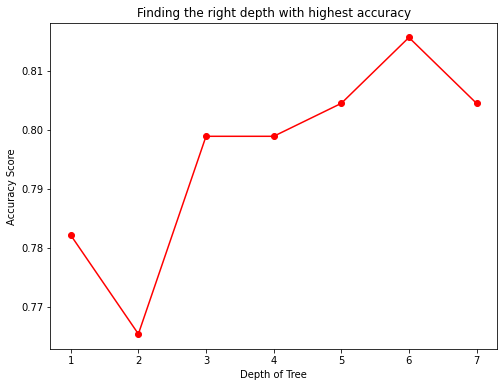

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(range(1,8),depth,color="red", marker = "o")
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy Score")
plt.title("Finding the right depth with highest accuracy")
plt.xticks(range(1,8))
plt.show()

參考資料:https://medium.com/geekculture/applying-7-classification-algorithms-on-the-titanic-dataset-278ef222b53c